In [1]:
# Installations nécessaires
!pip install pandas matplotlib numpy pillow tensorboardX tensorflow scikit-learn

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tensorboardX import SummaryWriter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

print("Tous les paquets ont été importés avec succès!")

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/ab/63/966db1321a0ad55df1d1fe51505d2cdae191b84c907974873817b0a6e849/pandas-2.2.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/3c/a5/54a497ca4af8e76adfe7c5a1712f3bb6b2222d464fe736b60aaafd425945/matplotlib-3.9.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/9b/0f/022ca4783b6e6239a53b988a4d315d67f9ae7126227fb2255054a558bd72/numpy-2.0.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ---------------------------------------- 60.9/60.9 kB 1.6 MB/s eta 0:00:00
  Obtaining dependency information for pillow from https://files.pythonhosted.org/packages/c1/d0/5866318eec2b801cdb8c82abf190c8343d8a1cd8bf5a0c17444a6f268291/pillow-10.4.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining depen

Epoch 1/20
669/669 ━━━━━━━━━━━━━━━━━━━━ 116s 166ms/step - accuracy: 0.3424 - loss: 1.6015 - val_accuracy: 0.4770 - val_loss: 1.3631
Epoch 2/20
669/669 ━━━━━━━━━━━━━━━━━━━━ 91s 136ms/step - accuracy: 0.4653 - loss: 1.4056 - val_accuracy: 0.5065 - val_loss: 1.3181
Epoch 3/20
669/669 ━━━━━━━━━━━━━━━━━━━━ 88s 132ms/step - accuracy: 0.4972 - loss: 1.3396 - val_accuracy: 0.5250 - val_loss: 1.2645
Epoch 4/20
669/669 ━━━━━━━━━━━━━━━━━━━━ 87s 129ms/step - accuracy: 0.5220 - loss: 1.2796 - val_accuracy: 0.5540 - val_loss: 1.1992
Epoch 5/20
669/669 ━━━━━━━━━━━━━━━━━━━━ 89s 132ms/step - accuracy: 0.5346 - loss: 1.2389 - val_accuracy: 0.5628 - val_loss: 1.1938
Epoch 6/20
669/669 ━━━━━━━━━━━━━━━━━━━━ 89s 132ms/step - accuracy: 0.5528 - loss: 1.2093 - val_accuracy: 0.5523 - val_loss: 1.1914
Epoch 7/20
669/669 ━━━━━━━━━━━━━━━━━━━━ 87s 130ms/step - accuracy: 0.5499 - loss: 1.1986 - val_accuracy: 0.5788 - val_loss: 1.1383
Epoch 8/20
669/669 ━━━━━━━━━━━━━━━━━━━━ 88s 132ms/step - accuracy: 0.5675 - loss: 

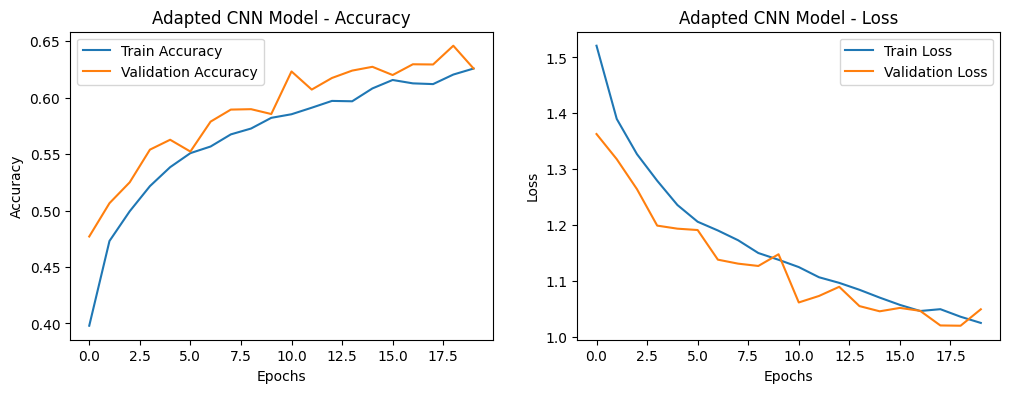

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

# Fonction pour charger les données
def load_data_from_directory(dirs):
    data = []
    labels = []

    label_mapping = {
        'Glass': 0,
        'Plastic': 1,
        'Aluminium': 2,
        'Organic': 3,
        'Carton': 4,
        'e-waste': 5,
    }

    for dir_path in dirs:
        dir_name = os.path.basename(dir_path)
        label = label_mapping.get(dir_name, -1)

        for file_name in os.listdir(dir_path):
            file_path = os.path.join(dir_path, file_name)
            if file_path.endswith('.jpg') or file_path.endswith('.png'):
                img = Image.open(file_path).convert('RGB')
                img_resized = img.resize((64, 64))
                img_array = np.array(img_resized)
                img_normalized = img_array / 255.0
                data.append(img_normalized)
                labels.append(label)
    
    return np.array(data), np.array(labels)

# Chemins des répertoires
dirs = [
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/Glass',
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/Plastic',
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/Carton',
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/Organic',
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/Aluminium',
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/e-waste',
]

# Charger les données
data, labels = load_data_from_directory(dirs)

# Convertir les labels en one-hot encoding
labels = to_categorical(labels, num_classes=6)

# Séparer les données en ensembles d'entraînement et de test
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Créer un générateur de données avec augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

# Préparer le générateur de données pour l'entraînement
datagen.fit(train_data)

# Définir le modèle CNN adapté
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(datagen.flow(train_data, train_labels, batch_size=32),
                    epochs=20,
                    validation_data=(test_data, test_labels))

# Évaluer le modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f'Test accuracy: {test_acc:.2f}')

# Afficher les courbes de performance
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} - Loss')
    plt.legend()
    
    plt.show()

# Afficher les courbes de performance
plot_history(history, 'Adapted CNN Model')


Epoch 1/20
669/669 ━━━━━━━━━━━━━━━━━━━━ 243s 351ms/step - accuracy: 0.3411 - loss: 2.0659 - val_accuracy: 0.4019 - val_loss: 1.6059 - learning_rate: 0.0010
Epoch 2/20
669/669 ━━━━━━━━━━━━━━━━━━━━ 215s 321ms/step - accuracy: 0.4465 - loss: 1.4853 - val_accuracy: 0.4781 - val_loss: 1.4170 - learning_rate: 0.0010
Epoch 3/20
669/669 ━━━━━━━━━━━━━━━━━━━━ 336s 502ms/step - accuracy: 0.4871 - loss: 1.3766 - val_accuracy: 0.4458 - val_loss: 1.4422 - learning_rate: 0.0010
Epoch 4/20
669/669 ━━━━━━━━━━━━━━━━━━━━ 272s 405ms/step - accuracy: 0.4952 - loss: 1.3375 - val_accuracy: 0.4798 - val_loss: 1.4168 - learning_rate: 0.0010
Epoch 5/20
669/669 ━━━━━━━━━━━━━━━━━━━━ 230s 343ms/step - accuracy: 0.5108 - loss: 1.3163 - val_accuracy: 0.4893 - val_loss: 1.4108 - learning_rate: 0.0010
Epoch 6/20
669/669 ━━━━━━━━━━━━━━━━━━━━ 228s 339ms/step - accuracy: 0.5314 - loss: 1.2724 - val_accuracy: 0.5291 - val_loss: 1.2580 - learning_rate: 0.0010
Epoch 7/20
669/669 ━━━━━━━━━━━━━━━━━━━━ 223s 332ms/step - accura

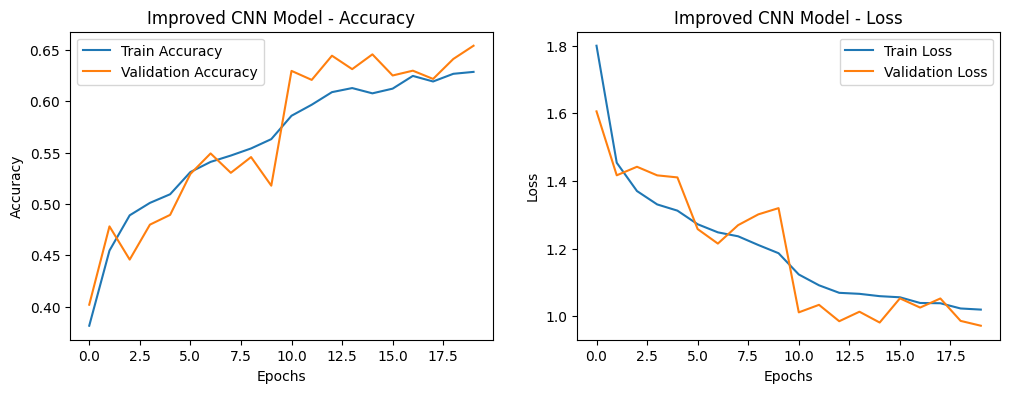

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

# Fonction pour charger les données
def load_data_from_directory(dirs):
    data = []
    labels = []

    label_mapping = {
        'Glass': 0,
        'Plastic': 1,
        'Aluminium': 2,
        'Organic': 3,
        'Carton': 4,
        'e-waste': 5,
    }

    for dir_path in dirs:
        dir_name = os.path.basename(dir_path)
        label = label_mapping.get(dir_name, -1)

        for file_name in os.listdir(dir_path):
            file_path = os.path.join(dir_path, file_name)
            if file_path.endswith('.jpg') or file_path.endswith('.png'):
                img = Image.open(file_path).convert('RGB')
                img_resized = img.resize((64, 64))
                img_array = np.array(img_resized)
                img_normalized = img_array / 255.0
                data.append(img_normalized)
                labels.append(label)
    
    return np.array(data), np.array(labels)

# Chemins des répertoires
dirs = [
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/Glass',
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/Plastic',
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/Carton',
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/Organic',
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/Aluminium',
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/e-waste',
]

# Charger les données
data, labels = load_data_from_directory(dirs)

# Convertir les labels en one-hot encoding
labels = to_categorical(labels, num_classes=6)

# Séparer les données en ensembles d'entraînement et de test
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Créer un générateur de données avec augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

# Préparer le générateur de données pour l'entraînement
datagen.fit(train_data)

# Définir le modèle CNN amélioré
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Définir un callback pour réduire le taux d'apprentissage
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Entraîner le modèle
history = model.fit(datagen.flow(train_data, train_labels, batch_size=32),
                    epochs=20,
                    validation_data=(test_data, test_labels),
                    callbacks=[reduce_lr])

# Évaluer le modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f'Test accuracy: {test_acc:.2f}')

# Afficher les courbes de performance
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} - Loss')
    plt.legend()
    
    plt.show()

# Afficher les courbes de performance
plot_history(history, 'Improved CNN Model')


C:\Users\chaimae\AppData\Local\Temp\ipykernel_12576\1192543745.py:86: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20


C:\Users\chaimae\miniconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


669/669 ━━━━━━━━━━━━━━━━━━━━ 97s 134ms/step - accuracy: 0.4621 - loss: 1.6479 - val_accuracy: 0.5925 - val_loss: 1.0894
Epoch 2/20
669/669 ━━━━━━━━━━━━━━━━━━━━ 92s 137ms/step - accuracy: 0.5470 - loss: 1.2171 - val_accuracy: 0.6235 - val_loss: 1.0290
Epoch 3/20
669/669 ━━━━━━━━━━━━━━━━━━━━ 83s 123ms/step - accuracy: 0.5625 - loss: 1.1667 - val_accuracy: 0.6213 - val_loss: 1.0325
Epoch 4/20
669/669 ━━━━━━━━━━━━━━━━━━━━ 78s 117ms/step - accuracy: 0.5725 - loss: 1.1572 - val_accuracy: 0.6237 - val_loss: 1.0197
Epoch 5/20
669/669 ━━━━━━━━━━━━━━━━━━━━ 85s 127ms/step - accuracy: 0.5854 - loss: 1.1199 - val_accuracy: 0.6252 - val_loss: 1.0036
Epoch 6/20
669/669 ━━━━━━━━━━━━━━━━━━━━ 90s 135ms/step - accuracy: 0.5868 - loss: 1.1119 - val_accuracy: 0.6426 - val_loss: 0.9859
Epoch 7/20
669/669 ━━━━━━━━━━━━━━━━━━━━ 80s 119ms/step - accuracy: 0.5919 - loss: 1.1110 - val_accuracy: 0.6418 - val_loss: 0.9797
Epoch 8/20
669/669 ━━━━━━━━━━━━━━━━━━━━ 80s 119ms/step - accuracy: 0.5944 - loss: 1.0964 - val

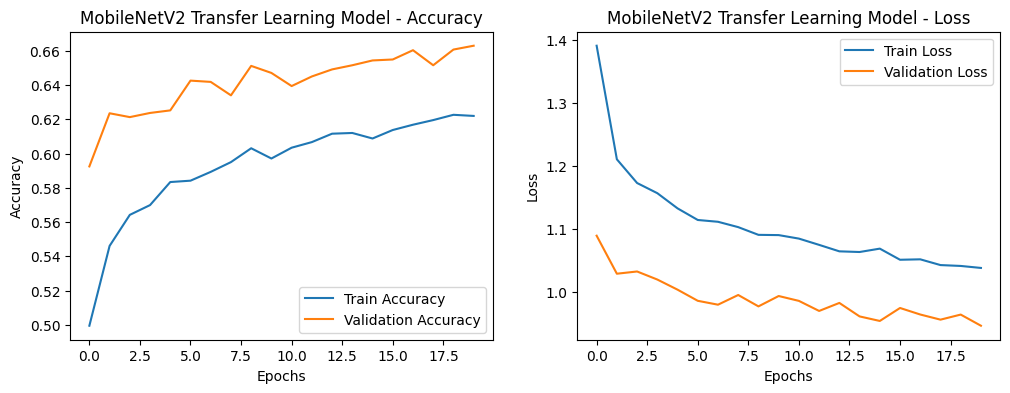

In [1]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
import os
from PIL import Image, ImageFile
import matplotlib.pyplot as plt

# Pour éviter les erreurs "OSError: broken data stream when reading image file"
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Fonction pour charger les données
def load_data_from_directory(dirs, image_size=(64, 64)):
    data = []
    labels = []

    label_mapping = {
        'Glass': 0,
        'Plastic': 1,
        'Aluminium': 2,
        'Organic': 3,
        'Carton': 4,
        'e-waste': 5,
    }

    for dir_path in dirs:
        dir_name = os.path.basename(dir_path)
        label = label_mapping.get(dir_name, -1)

        for file_name in os.listdir(dir_path):
            file_path = os.path.join(dir_path, file_name)
            if file_path.endswith('.jpg') or file_path.endswith('.png'):
                try:
                    img = Image.open(file_path)
                    if img.mode in ('P', 'LA') or (img.mode == 'P' and 'transparency' in img.info):
                        img = img.convert('RGBA')
                    img = img.convert('RGB')
                    img_resized = img.resize(image_size)
                    img_array = np.array(img_resized, dtype=np.float32)
                    img_normalized = img_array / 255.0
                    data.append(img_normalized)
                    labels.append(label)
                except (OSError, ValueError) as e:
                    print(f"Skipping corrupted image: {file_path} - {e}")
    
    return np.array(data, dtype=np.float32), np.array(labels)

# Chemins des répertoires
dirs = [
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/Glass',
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/Plastic',
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/Carton',
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/Organic',
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/Aluminium',
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/e-waste',
]

# Charger les données avec une taille d'image réduite
data, labels = load_data_from_directory(dirs, image_size=(64, 64))

# Convertir les labels en one-hot encoding
labels = to_categorical(labels, num_classes=6)

# Séparer les données en ensembles d'entraînement et de test
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Créer un générateur de données avec augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

# Préparer le générateur de données pour l'entraînement
datagen.fit(train_data)

# Charger le modèle MobileNetV2 pré-entraîné sans les couches de classification
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Geler les couches de MobileNetV2
for layer in base_model.layers:
    layer.trainable = False

# Ajouter les couches de classification personnalisées
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(datagen.flow(train_data, train_labels, batch_size=32),
                    epochs=20,
                    validation_data=(test_data, test_labels))

# Évaluer le modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f'Test accuracy: {test_acc:.2f}')

# Afficher les courbes de performance
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} - Loss')
    plt.legend()
    
    plt.show()

# Afficher les courbes de performance
plot_history(history, 'MobileNetV2 Transfer Learning Model')


Epoch 1/20
669/669 ━━━━━━━━━━━━━━━━━━━━ 319s 464ms/step - accuracy: 0.5395 - loss: 2.1455 - val_accuracy: 0.7418 - val_loss: 0.7532
Epoch 2/20
669/669 ━━━━━━━━━━━━━━━━━━━━ 323s 477ms/step - accuracy: 0.6540 - loss: 0.9825 - val_accuracy: 0.7704 - val_loss: 0.6675
Epoch 3/20
669/669 ━━━━━━━━━━━━━━━━━━━━ 347s 497ms/step - accuracy: 0.6799 - loss: 0.9082 - val_accuracy: 0.7782 - val_loss: 0.6405
Epoch 4/20
669/669 ━━━━━━━━━━━━━━━━━━━━ 351s 505ms/step - accuracy: 0.6994 - loss: 0.8765 - val_accuracy: 0.7855 - val_loss: 0.6292
Epoch 5/20
669/669 ━━━━━━━━━━━━━━━━━━━━ 347s 483ms/step - accuracy: 0.7065 - loss: 0.8503 - val_accuracy: 0.7821 - val_loss: 0.6251
Epoch 6/20
669/669 ━━━━━━━━━━━━━━━━━━━━ 354s 499ms/step - accuracy: 0.7156 - loss: 0.8227 - val_accuracy: 0.7887 - val_loss: 0.6190
Epoch 7/20
669/669 ━━━━━━━━━━━━━━━━━━━━ 346s 516ms/step - accuracy: 0.7089 - loss: 0.8356 - val_accuracy: 0.7900 - val_loss: 0.6062
Epoch 8/20
669/669 ━━━━━━━━━━━━━━━━━━━━ 377s 562ms/step - accuracy: 0.7231 -

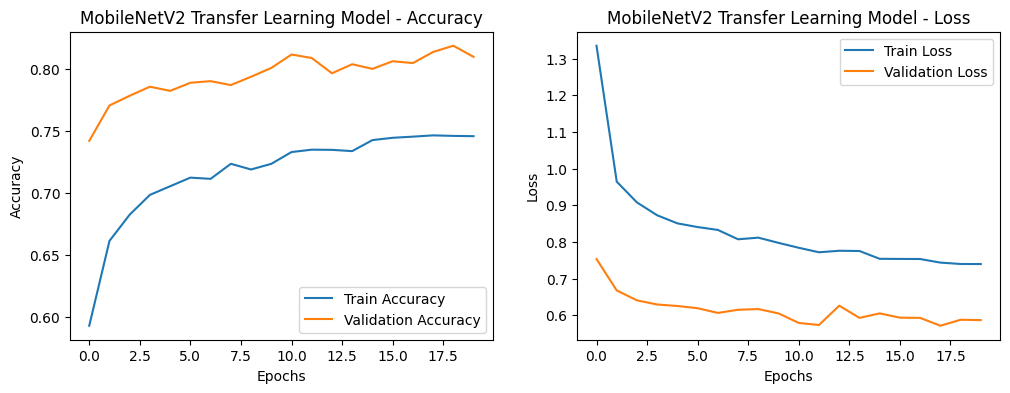

In [2]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
import os
from PIL import Image, ImageFile
import matplotlib.pyplot as plt

# Pour éviter les erreurs "OSError: broken data stream when reading image file"
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Fonction pour charger les données
def load_data_from_directory(dirs, image_size=(128, 128)):
    data = []
    labels = []

    label_mapping = {
        'Glass': 0,
        'Plastic': 1,
        'Aluminium': 2,
        'Organic': 3,
        'Carton': 4,
        'e-waste': 5,
    }

    for dir_path in dirs:
        dir_name = os.path.basename(dir_path)
        label = label_mapping.get(dir_name, -1)

        for file_name in os.listdir(dir_path):
            file_path = os.path.join(dir_path, file_name)
            if file_path.endswith('.jpg') or file_path.endswith('.png'):
                try:
                    img = Image.open(file_path)
                    if img.mode in ('P', 'LA') or (img.mode == 'P' and 'transparency' in img.info):
                        img = img.convert('RGBA')
                    img = img.convert('RGB')
                    img_resized = img.resize(image_size)
                    img_array = np.array(img_resized, dtype=np.float32)
                    img_normalized = img_array / 255.0
                    data.append(img_normalized)
                    labels.append(label)
                except (OSError, ValueError) as e:
                    print(f"Skipping corrupted image: {file_path} - {e}")
    
    return np.array(data, dtype=np.float32), np.array(labels)

# Chemins des répertoires
dirs = [
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/Glass',
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/Plastic',
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/Carton',
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/Organic',
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/Aluminium',
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/e-waste',
]

# Charger les données avec une taille d'image de 128x128
data, labels = load_data_from_directory(dirs, image_size=(128, 128))

# Convertir les labels en one-hot encoding
labels = to_categorical(labels, num_classes=6)

# Séparer les données en ensembles d'entraînement et de test
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Créer un générateur de données avec augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

# Préparer le générateur de données pour l'entraînement
datagen.fit(train_data)

# Charger le modèle MobileNetV2 pré-entraîné sans les couches de classification
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Geler les couches de MobileNetV2
for layer in base_model.layers:
    layer.trainable = False

# Ajouter les couches de classification personnalisées
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(datagen.flow(train_data, train_labels, batch_size=32),
                    epochs=20,
                    validation_data=(test_data, test_labels))

# Évaluer le modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f'Test accuracy: {test_acc:.2f}')

# Afficher les courbes de performance
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} - Loss')
    plt.legend()
    
    plt.show()

# Afficher les courbes de performance
plot_history(history, 'MobileNetV2 Transfer Learning Model')


In [6]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, Sequence
from sklearn.model_selection import train_test_split
import numpy as np
import os
from PIL import Image, ImageFile
import matplotlib.pyplot as plt

# Pour éviter les erreurs "OSError: broken data stream when reading image file"
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Générateur de données personnalisé
class DataGenerator(Sequence):
    def __init__(self, image_paths, labels, batch_size=32, image_size=(128, 128), n_classes=6, shuffle=True):
        self.image_paths = image_paths
        self.labels = labels
        self.batch_size = batch_size
        self.image_size = image_size
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.image_paths) / self.batch_size))

    def __getitem__(self, index):
        indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        batch_image_paths = [self.image_paths[k] for k in indices]
        batch_labels = [self.labels[k] for k in indices]

        X, y = self.__data_generation(batch_image_paths, batch_labels)
        return X, y

    def on_epoch_end(self):
        self.indices = np.arange(len(self.image_paths))
        if self.shuffle:
            np.random.shuffle(self.indices)

    def __data_generation(self, batch_image_paths, batch_labels):
        X = np.empty((self.batch_size, *self.image_size, 3), dtype=np.float32)
        y = np.empty((self.batch_size), dtype=int)

        for i, (img_path, label) in enumerate(zip(batch_image_paths, batch_labels)):
            img = Image.open(img_path)
            if img.mode in ('P', 'LA') or (img.mode == 'P' and 'transparency' in img.info):
                img = img.convert('RGBA')
            img = img.convert('RGB')
            img_resized = img.resize(self.image_size)
            img_array = np.array(img_resized, dtype=np.float32) / 255.0

            X[i,] = img_array
            y[i] = label

        return X, to_categorical(y, num_classes=self.n_classes)

# Fonction pour charger les chemins des images et les labels
def load_image_paths_and_labels(dirs):
    image_paths = []
    labels = []

    label_mapping = {
        'Glass': 0,
        'Plastic': 1,
        'Aluminium': 2,
        'Organic': 3,
        'Carton': 4,
        'e-waste': 5,
    }

    for dir_path in dirs:
        dir_name = os.path.basename(dir_path)
        label = label_mapping.get(dir_name, -1)

        for file_name in os.listdir(dir_path):
            file_path = os.path.join(dir_path, file_name)
            if file_path.endswith('.jpg') or file_path.endswith('.png'):
                image_paths.append(file_path)
                labels.append(label)
    
    return image_paths, labels

# Chemins des répertoires
dirs = [
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/Glass',
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/Plastic',
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/Carton',
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/Organic',
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/Aluminium',
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/e-waste',
]

# Charger les chemins des images et les labels
image_paths, labels = load_image_paths_and_labels(dirs)

# Séparer les données en ensembles d'entraînement et de test
train_paths, test_paths, train_labels, test_labels = train_test_split(image_paths, labels, test_size=0.2, random_state=42)

# Créer les générateurs de données
train_generator = DataGenerator(train_paths, train_labels, batch_size=32, image_size=(128, 128), n_classes=6, shuffle=True)
test_generator = DataGenerator(test_paths, test_labels, batch_size=32, image_size=(128, 128), n_classes=6, shuffle=False)

# Charger le modèle MobileNetV2 pré-entraîné sans les couches de classification
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Geler les couches de MobileNetV2
for layer in base_model.layers:
    layer.trainable = False

# Ajouter les couches de classification personnalisées
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle initial
history = model.fit(train_generator,
                    epochs=20,
                    validation_data=test_generator)

# Sauvegarder les poids après la première phase d'entraînement
model.save_weights('model_initial_weights.h5')

# Dégeler les dernières couches de MobileNetV2 pour le fine-tuning
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Recharger les poids sauvegardés
model.load_weights('model_initial_weights.h5')

# Compiler de nouveau le modèle
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Ré-entraîner le modèle avec le fine-tuning
history_fine_tune = model.fit(train_generator,
                              epochs=10,
                              validation_data=test_generator)

# Évaluer le modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.2f}')

# Afficher les courbes de performance
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} - Loss')
    plt.legend()
    
    plt.show()

# Afficher les courbes de performance pour le modèle initial
plot_history(history, 'MobileNetV2 Transfer Learning Model')

# Afficher les courbes de performance pour le fine-tuning
plot_history(history_fine_tune, 'MobileNetV2 Fine-Tuning Model')

# Analyse des résultats
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Prédictions sur les données de test
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.concatenate([test_generator[i][1] for i in range(len(test_generator))], axis=0)
y_true = np.argmax(y_true, axis=1)

# Classification report
print(classification_report(y_true, y_pred_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Epoch 1/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 463s 682ms/step - accuracy: 0.6373 - loss: 1.6588 - val_accuracy: 0.7837 - val_loss: 0.6179
Epoch 2/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 478s 713ms/step - accuracy: 0.7693 - loss: 0.6663 - val_accuracy: 0.8060 - val_loss: 0.5563
Epoch 3/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 407s 607ms/step - accuracy: 0.8059 - loss: 0.5674 - val_accuracy: 0.8060 - val_loss: 0.5586
Epoch 4/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 464s 692ms/step - accuracy: 0.8303 - loss: 0.4931 - val_accuracy: 0.8125 - val_loss: 0.5659
Epoch 5/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 412s 614ms/step - accuracy: 0.8476 - loss: 0.4297 - val_accuracy: 0.8190 - val_loss: 0.5531
Epoch 6/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 433s 645ms/step - accuracy: 0.8601 - loss: 0.4024 - val_accuracy: 0.8204 - val_loss: 0.5559
Epoch 7/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 428s 638ms/step - accuracy: 0.8709 - loss: 0.3582 - val_accuracy: 0.8215 - val_loss: 0.6022
Epoch 8/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 439s 653ms/step - accuracy: 0.8741 -

KeyboardInterrupt: 

In [7]:
!pip install h5py

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
from PIL import Image, ImageFile
import matplotlib.pyplot as plt
import os
import h5py

# Pour éviter les erreurs "OSError: broken data stream when reading image file"
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Fonction pour charger les données
def load_data_from_directory(dirs, image_size=(128, 128)):
    data = []
    labels = []

    label_mapping = {
        'Glass': 0,
        'Plastic': 1,
        'Aluminium': 2,
        'Organic': 3,
        'Carton': 4,
        'e-waste': 5,
    }

    for dir_path in dirs:
        dir_name = os.path.basename(dir_path)
        label = label_mapping.get(dir_name, -1)

        for file_name in os.listdir(dir_path):
            file_path = os.path.join(dir_path, file_name)
            if file_path.endswith('.jpg') or file_path.endswith('.png'):
                try:
                    img = Image.open(file_path)
                    if img.mode in ('P', 'LA') or (img.mode == 'P' and 'transparency' in img.info):
                        img = img.convert('RGBA')
                    img = img.convert('RGB')
                    img_resized = img.resize(image_size)
                    img_array = np.array(img_resized, dtype=np.float32)
                    img_normalized = img_array / 255.0
                    data.append(img_normalized)
                    labels.append(label)
                except (OSError, ValueError) as e:
                    print(f"Skipping corrupted image: {file_path} - {e}")

    return np.array(data, dtype=np.float32), np.array(labels)

# Chemins des répertoires

dirs = [
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/Glass',
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/Plastic',
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/Carton',
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/Organic',
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/Aluminium',
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024/e-waste',
]

# Charger les données avec une taille d'image de 128x128
data, labels = load_data_from_directory(dirs, image_size=(128, 128))

# Convertir les labels en one-hot encoding
labels = to_categorical(labels, num_classes=6)

# Séparer les données en ensembles d'entraînement et de test
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Créer un générateur de données avec augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

# Préparer le générateur de données pour l'entraînement
datagen.fit(train_data)

# Charger le modèle MobileNetV2 pré-entraîné sans les couches de classification
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Geler les couches de MobileNetV2
for layer in base_model.layers:
    layer.trainable = False

# Ajouter les couches de classification personnalisées
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(datagen.flow(train_data, train_labels, batch_size=32),
                    epochs=20,
                    validation_data=(test_data, test_labels))

# Évaluer le modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f'Test accuracy: {test_acc:.2f}')

# Sauvegarder le modèle
model.save('C:/Users/chaimae/Projet_Annuel_4AIBD-master/myproject/mobilenetv2_model.h5')
print("Modèle sauvegardé avec succès.")

# Afficher les courbes de performance
def plot_history(history, title):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.show()

# Afficher les courbes de performance
plot_history(history, 'MobileNetV2 Transfer Learning Model')


ImportError: Loading a H5 file requires `h5py` to be installed.

In [8]:
import h5py
import tensorflow as tf
import numpy as np
from PIL import Image

print("version de h5py:", h5py.__version__)
print("version de TensorFlow:", tf.__version__)
print("version de Numpy:", np.__version__)
print("version de PIL:", Image.__version__)

# Création simple d'un fichier HDF5 pour tester
with h5py.File('test.h5', 'w') as f:
    dset = f.create_dataset("default", (100,), dtype='i')

print("Fichier HDF5 créé avec succès.")


version de h5py: 3.11.0
version de TensorFlow: 2.17.0
version de Numpy: 1.26.4
version de PIL: 10.4.0
Fichier HDF5 créé avec succès.


In [11]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os

# Créer un générateur de données avec augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest',
    validation_split=0.2  # Utiliser une partie des données pour la validation
)

# Préparer le générateur de données pour l'entraînement
train_generator = datagen.flow_from_directory(
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    'C:/Users/chaimae/Projet_Annuel_4AIBD-master/DataSet_2024',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Charger le modèle MobileNetV2 pré-entraîné sans les couches de classification
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Geler les couches de MobileNetV2
for layer in base_model.layers:
    layer.trainable = False

# Ajouter les couches de classification personnalisées
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(train_generator,
                    epochs=20,
                    validation_data=validation_generator)

# Évaluer le modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy: {test_acc:.2f}')

# Sauvegarder le modèle
model.save('C:/Users/chaimae/Projet_Annuel_4AIBD-master/myproject/mobilenetv2_model.h5')
print("Modèle sauvegardé avec succès.")

# Afficher les courbes de performance
def plot_history(history, title):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.show()

# Afficher les courbes de performance
plot_history(history, 'MobileNetV2 Transfer Learning Model')


Found 21600 images belonging to 6 classes.
Found 5400 images belonging to 6 classes.


ImportError: Loading a H5 file requires `h5py` to be installed.

In [12]:
import h5py
import tensorflow as tf
import numpy as np
from PIL import Image

print("h5py version:", h5py.__version__)
print("TensorFlow version:", tf.__version__)
print("Numpy version:", np.__version__)
print("PIL version:", Image.__version__)

# Vérifiez la création d'un fichier HDF5
with h5py.File('test.h5', 'w') as f:
    dset = f.create_dataset("default", (100,), dtype='i')

print("Fichier HDF5 créé avec succès.")


h5py version: 3.11.0
TensorFlow version: 2.17.0
Numpy version: 1.26.4
PIL version: 10.4.0
Fichier HDF5 créé avec succès.
